In [ ]:
!pip install nltk

In [ ]:
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re


from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics  


# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings   


warnings.filterwarnings('ignore')
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('/content/Tweets 3.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Total Null Values in Dataset :
tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


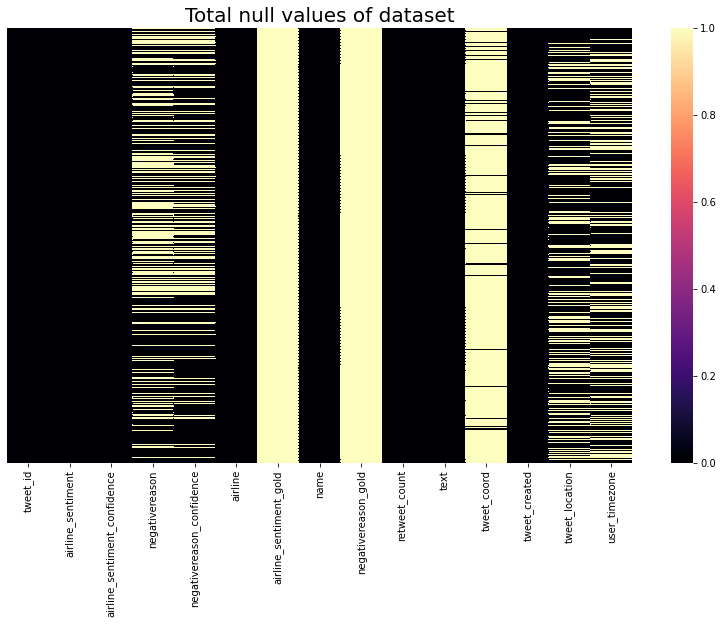

In [ ]:
cprint('Total Null Values in Dataset :','green')
print(df.isnull().sum()) # showing null values of train data
plt.figure(figsize=(14,8))


# visualize null values
sns.heatmap(df.isnull(), yticklabels = False, cmap='magma')
plt.title('Total null values of dataset',size=20);

Total number of sentiments of tweets :
negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


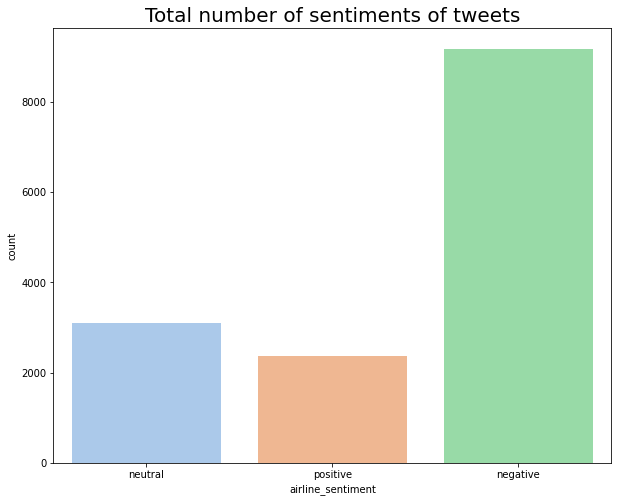

In [ ]:
cprint("Total number of sentiments of tweets :",'green')
print(df.airline_sentiment.value_counts())
plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline_sentiment', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of sentiments of tweets', fontsize = 20)
plt.show()


Total number of tweets for each airline :
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


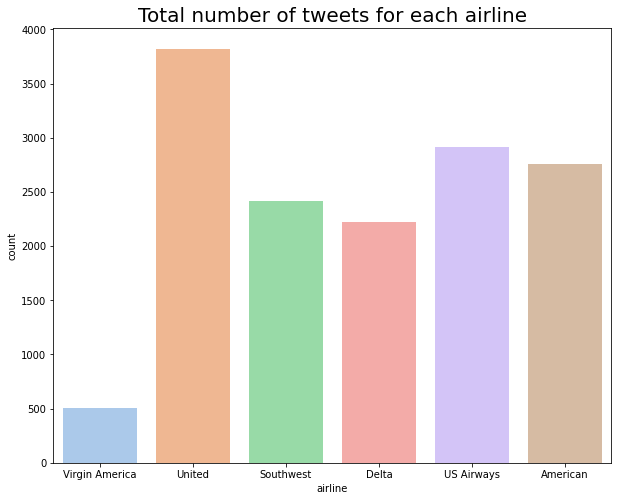

Total number of sentiment tweets for each airline :
US Airways : 
 negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
United : 
 negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
American : 
 negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
Southwest : 
 negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
Delta : 
 negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
Virgin America : 
 negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


In [ ]:
cprint("Total number of tweets for each airline :",'green')
print(df.groupby('airline')['airline_sentiment'].count())



plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 20)
plt.show()


cprint("Total number of sentiment tweets for each airline :",'green')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines :
    print('{} : \n'.format(i),df.loc[df.airline == i].airline_sentiment.value_counts())

Reasons Of Negative Tweets :
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


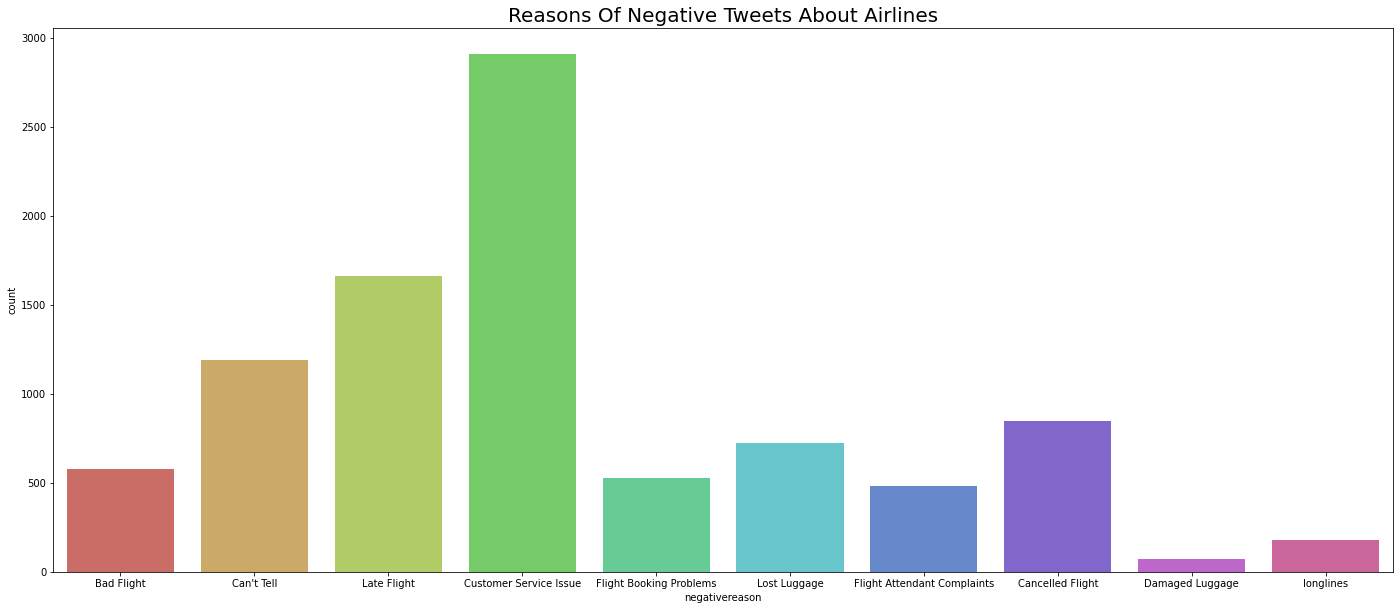

In [ ]:
cprint('Reasons Of Negative Tweets :','green')
print(df.negativereason.value_counts())

plt.figure(figsize = (24, 10))
sns.countplot(x = 'negativereason', data = df, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()


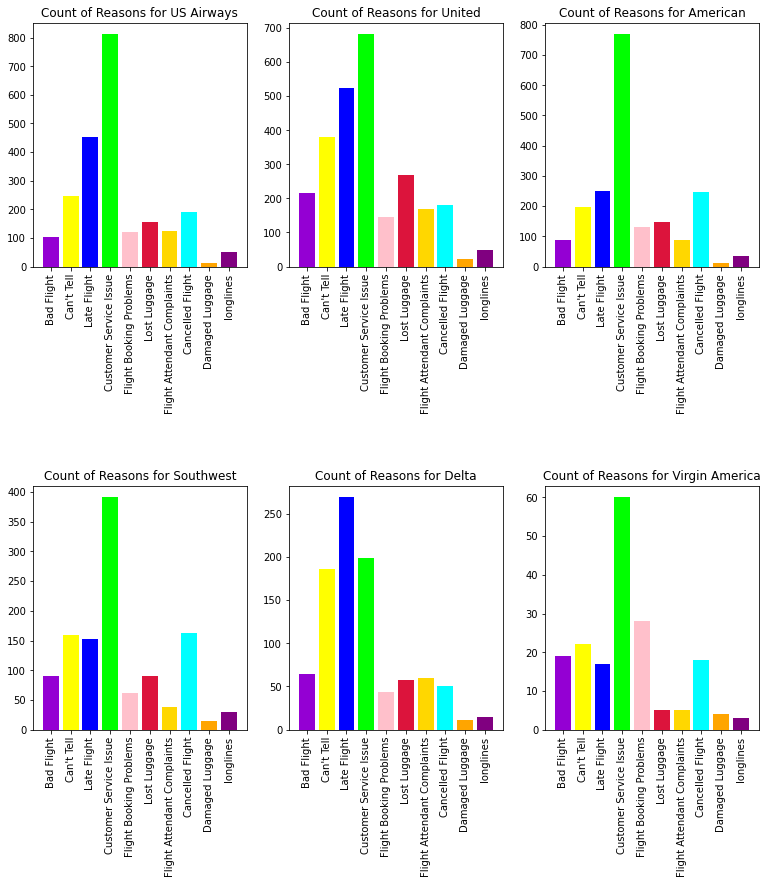

In [ ]:
NR_Count=df['negativereason'].value_counts()
def NCount(Airline):
    airlineName =df[df['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= df['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)
    
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)


In [ ]:
# Split text of Sentiments    
positive = df[df['airline_sentiment'] == 'positive'].text
neutral  = df[df['airline_sentiment'] == 'neutral'].text
negative  = df[df['airline_sentiment'] == 'negative'].text

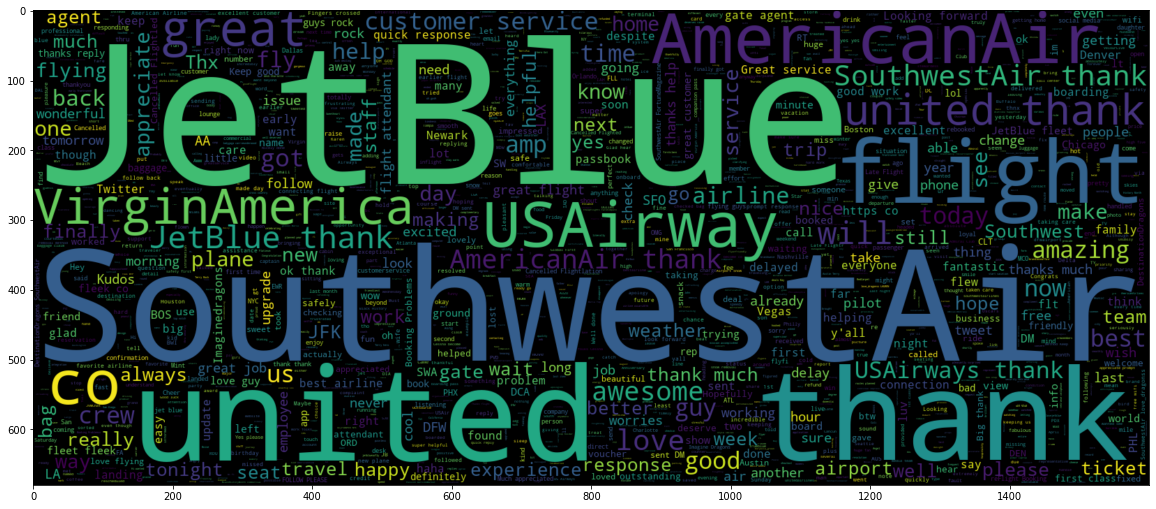

In [ ]:
# world could of positive sentiments
plt.figure(figsize = (20,20)) 
worldcould_pos = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(positive))
plt.imshow(worldcould_pos,interpolation = 'bilinear')
ax.grid(False)


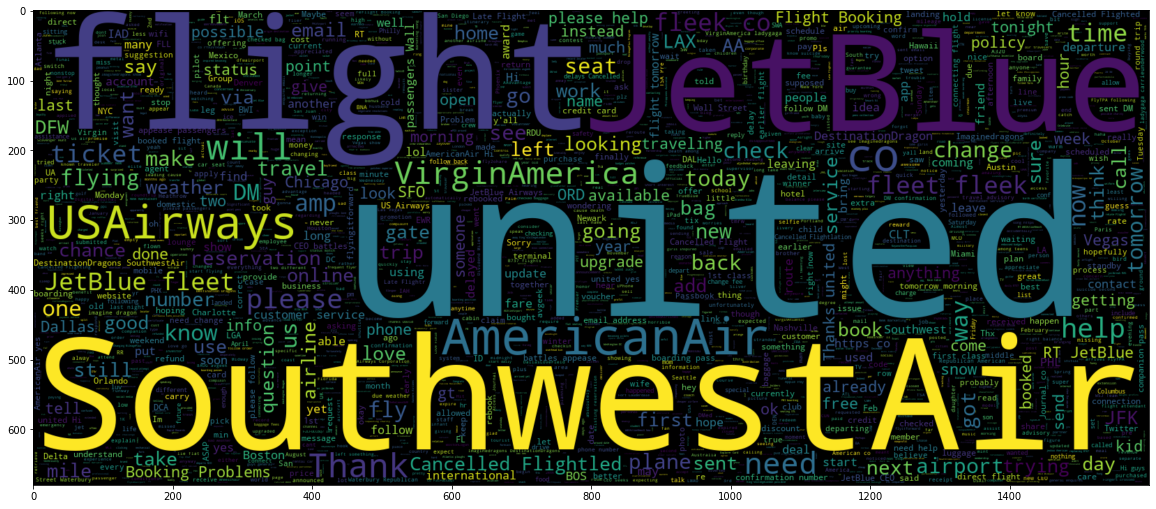

In [ ]:
# world could of neutral sentiments
plt.figure(figsize = (20,20)) 
worldcould_neutral = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(neutral))
plt.imshow(worldcould_neutral,interpolation = 'bilinear')
ax.grid(False)


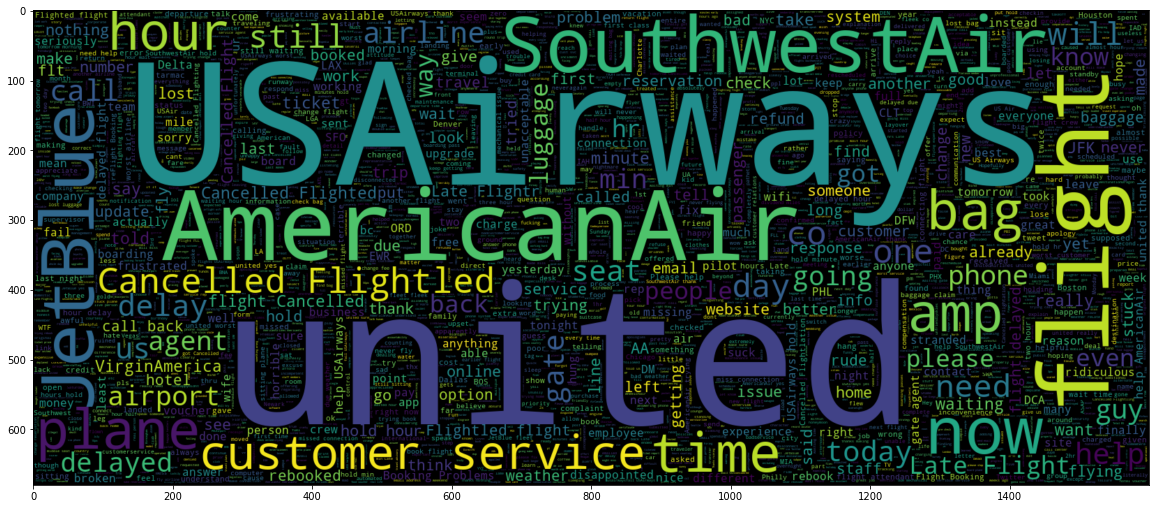

In [ ]:
# world could of negative sentiments
plt.figure(figsize = (20,20)) 
worldcould_neg = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(negative))
plt.imshow(worldcould_neg,interpolation = 'bilinear')
ax.grid(False)


In [ ]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [ ]:
# Apply convert_Sentiment function
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))


In [ ]:
df.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combine negative reason with  tweet (if exsist)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text'] 


# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))




In [ ]:
 #result
df['final_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object

In [ ]:
X = df['final_text']
y = df['airline_sentiment']

In [ ]:
# Apply TFIDF on cleaned tweets
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)



In [ ]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [ ]:
# Split Data into train & test 
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2)


In [ ]:
X_test

<5507x10989 sparse matrix of type '<class 'numpy.float64'>'
	with 47039 stored elements in Compressed Sparse Row format>

In [ ]:
le=LogisticRegression(penalty='l2',)
le.fit(X_train,y_train)

LogisticRegression()

In [ ]:
le_training= le.predict(X_train)

In [ ]:
accuracy_score(le_training,y_train)

0.9292686248694784

In [ ]:
tr = classification_report(y_train, le_training)

In [ ]:
print("Classification Report:\n----------------------\n", tr)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7408
           1       0.87      0.94      0.90      7284
           2       0.95      0.85      0.90      7335

    accuracy                           0.93     22027
   macro avg       0.93      0.93      0.93     22027
weighted avg       0.93      0.93      0.93     22027



In [ ]:
le_prediction= le.predict(X_test)

In [ ]:
le_pred_proba = le.predict_proba(X_test)[:,1]

In [ ]:
accuracy_score(le_prediction,y_test)

0.9052115489377156

In [ ]:
cr = classification_report(y_test, le_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1770
           1       0.84      0.92      0.88      1894
           2       0.93      0.81      0.87      1843

    accuracy                           0.91      5507
   macro avg       0.91      0.91      0.91      5507
weighted avg       0.91      0.91      0.90      5507



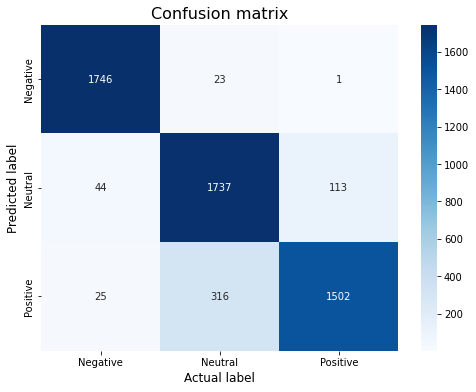

In [ ]:
print("Classification Report:\n----------------------\n", cr)

cm = confusion_matrix(y_test,le_prediction)


# plot confusion matrix 
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
rf = RandomForestClassifier(max_depth=None,n_estimators=1000)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
rf_training= rf.predict(X_train)

In [ ]:
accuracy_score(rf_training, y_train)

0.9963680937031825

In [ ]:
rf_prediction =  rf.predict(X_test)

In [ ]:
accuracy_score(rf_prediction,y_test)

0.9555111676048665

In [ ]:
tr1 = classification_report(y_train, rf_training)

In [ ]:
print("Classification Report:\n----------------------\n", tr1)


Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7330
           1       1.00      0.99      0.99      7372
           2       0.99      1.00      0.99      7325

    accuracy                           1.00     22027
   macro avg       1.00      1.00      1.00     22027
weighted avg       1.00      1.00      1.00     22027



In [ ]:
cr1 = classification_report(y_test, rf_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1848
           1       0.94      0.94      0.94      1806
           2       0.95      0.94      0.94      1853

    accuracy                           0.96      5507
   macro avg       0.96      0.96      0.96      5507
weighted avg       0.96      0.96      0.96      5507



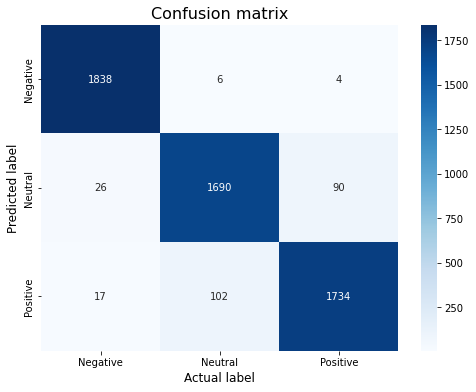

In [ ]:
print("Classification Report:\n----------------------\n", cr1)

cm1 = confusion_matrix(y_test,rf_prediction)


# plot confusion matrix 
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm1, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()


In [ ]:
svm = SVC(kernel='linear',C=0.1)
svm.fit(X_train,y_train)


SVC(C=0.1, kernel='linear')

In [ ]:
svm_training = svm.predict(X_train)

In [ ]:
accuracy_score(svm_training,y_train)

0.8562673083034458

In [ ]:
svm_prediction =  svm.predict(X_test)

In [ ]:
accuracy_score(svm_prediction,y_test)

0.8438351189395316

In [ ]:
tr2 = classification_report(y_train, svm_training)

In [ ]:
print("Classification Report:\n----------------------\n", tr2)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7330
           1       0.92      0.98      0.95      7372
           2       0.98      0.91      0.94      7325

    accuracy                           0.96     22027
   macro avg       0.96      0.96      0.96     22027
weighted avg       0.96      0.96      0.96     22027



In [ ]:
cr2 = classification_report(y_test, svm_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1848
           1       0.88      0.95      0.91      1806
           2       0.96      0.86      0.91      1853

    accuracy                           0.94      5507
   macro avg       0.94      0.94      0.94      5507
weighted avg       0.94      0.94      0.94      5507



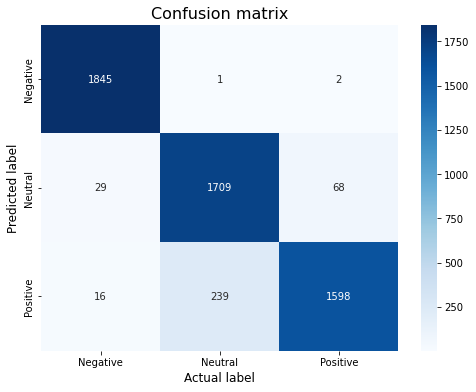

In [ ]:
print("Classification Report:\n----------------------\n", cr2)

cm2 = confusion_matrix(y_test,svm_prediction)


# plot confusion matrix 
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm2, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()


In [ ]:
nb = MultinomialNB()
nb.fit(X_train,y_train)


MultinomialNB()

In [ ]:
nb_training= nb.predict(X_train)

In [ ]:
accuracy_score(nb_training,y_train)

0.892132382984519

In [ ]:
nb_prediction =  nb.predict(X_test)

In [ ]:
accuracy_score(nb_prediction,y_test)

0.8612674777555838

In [ ]:
tr3 = classification_report(y_train, nb_training)

In [ ]:
print("Classification Report:\n----------------------\n", tr3)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.84      0.98      0.90      7330
           1       0.93      0.78      0.85      7372
           2       0.92      0.91      0.92      7325

    accuracy                           0.89     22027
   macro avg       0.90      0.89      0.89     22027
weighted avg       0.90      0.89      0.89     22027



In [ ]:

cr3 = classification_report(y_test, nb_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.81      0.96      0.88      1848
           1       0.89      0.73      0.80      1806
           2       0.90      0.88      0.89      1853

    accuracy                           0.86      5507
   macro avg       0.87      0.86      0.86      5507
weighted avg       0.87      0.86      0.86      5507



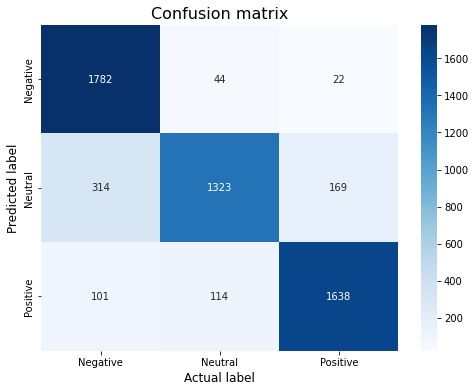

In [ ]:
print("Classification Report:\n----------------------\n", cr3)

cm3 = confusion_matrix(y_test,nb_prediction)


# plot confusion matrix 
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm3, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()


In [ ]:
ds = DecisionTreeClassifier()
ds.fit(X_train,y_train)


DecisionTreeClassifier()

In [ ]:
ds_training= ds.predict(X_train)

In [ ]:
tr4 = classification_report(y_train, ds_training)

In [ ]:
print("Classification Report:\n----------------------\n", tr4)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7330
           1       1.00      0.99      0.99      7372
           2       0.99      1.00      0.99      7325

    accuracy                           1.00     22027
   macro avg       1.00      1.00      1.00     22027
weighted avg       1.00      1.00      1.00     22027



In [ ]:
ds_prediction =  ds.predict(X_test)

In [ ]:
cr4 = classification_report(y_test, ds_prediction)

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1848
           1       0.91      0.92      0.91      1806
           2       0.92      0.92      0.92      1853

    accuracy                           0.94      5507
   macro avg       0.94      0.94      0.94      5507
weighted avg       0.94      0.94      0.94      5507



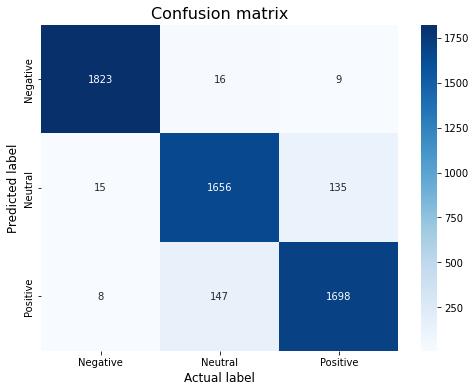

In [ ]:
print("Classification Report:\n----------------------\n", cr4)

cm4 = confusion_matrix(y_test,ds_prediction)


# plot confusion matrix 
plt.figure(figsize=(8,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm4, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()
